In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import pathlib
from google.colab import drive

In [ ]:
tf.__version__

'2.7.0'

# Data preprocessing

In [12]:
image_input = sorted(tf.io.gfile.glob('/content/drive/MyDrive/My Colab/ISIC2018_Task1-2_Training_Input_x2/*.jpg'))

In [13]:
len(image_input)

2594

In [14]:
ground_truth = sorted(tf.io.gfile.glob('/content/drive/MyDrive/My Colab/ISIC2018_Task1_Training_GroundTruth_x2/*.png'))
len(ground_truth)

2594

In [15]:
image_input[:5]

['/content/drive/MyDrive/My Colab/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000000.jpg',
 '/content/drive/MyDrive/My Colab/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000001.jpg',
 '/content/drive/MyDrive/My Colab/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000003.jpg',
 '/content/drive/MyDrive/My Colab/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000004.jpg',
 '/content/drive/MyDrive/My Colab/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000006.jpg']

In [16]:
ground_truth[:5]

['/content/drive/MyDrive/My Colab/ISIC2018_Task1_Training_GroundTruth_x2/ISIC_0000000_segmentation.png',
 '/content/drive/MyDrive/My Colab/ISIC2018_Task1_Training_GroundTruth_x2/ISIC_0000001_segmentation.png',
 '/content/drive/MyDrive/My Colab/ISIC2018_Task1_Training_GroundTruth_x2/ISIC_0000003_segmentation.png',
 '/content/drive/MyDrive/My Colab/ISIC2018_Task1_Training_GroundTruth_x2/ISIC_0000004_segmentation.png',
 '/content/drive/MyDrive/My Colab/ISIC2018_Task1_Training_GroundTruth_x2/ISIC_0000006_segmentation.png']

In [17]:
# Disorder the data and keep the input image and truth ground one-to-one correspondence

index = np.random.permutation(len(image_input))
image_input = np.array(image_input)[index]
ground_truth = np.array(ground_truth)[index]

In [20]:
image_input[:3]

array(['/content/drive/MyDrive/My Colab/ISIC2018_Task1-2_Training_Input_x2/ISIC_0010339.jpg',
       '/content/drive/MyDrive/My Colab/ISIC2018_Task1-2_Training_Input_x2/ISIC_0002879.jpg',
       '/content/drive/MyDrive/My Colab/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000384.jpg'],
      dtype='<U83')

In [19]:
ground_truth[:3]

array(['/content/drive/MyDrive/My Colab/ISIC2018_Task1_Training_GroundTruth_x2/ISIC_0010339_segmentation.png',
       '/content/drive/MyDrive/My Colab/ISIC2018_Task1_Training_GroundTruth_x2/ISIC_0002879_segmentation.png',
       '/content/drive/MyDrive/My Colab/ISIC2018_Task1_Training_GroundTruth_x2/ISIC_0000384_segmentation.png'],
      dtype='<U100')

In [21]:
# Divide the dataset into training set, test set and val set with 6：2：2
length = len(image_input)
print(length)

2594


In [22]:
image_input_val = image_input[:(int(length*0.2))]
print(len(image_input_val))
ground_truth_val = ground_truth[:(int(length*0.2))]
print(len(ground_truth_val))

518
518


In [24]:
image_input_val[:3]

array(['/content/drive/MyDrive/My Colab/ISIC2018_Task1-2_Training_Input_x2/ISIC_0010339.jpg',
       '/content/drive/MyDrive/My Colab/ISIC2018_Task1-2_Training_Input_x2/ISIC_0002879.jpg',
       '/content/drive/MyDrive/My Colab/ISIC2018_Task1-2_Training_Input_x2/ISIC_0000384.jpg'],
      dtype='<U83')

In [25]:
ground_truth_val[:3]

array(['/content/drive/MyDrive/My Colab/ISIC2018_Task1_Training_GroundTruth_x2/ISIC_0010339_segmentation.png',
       '/content/drive/MyDrive/My Colab/ISIC2018_Task1_Training_GroundTruth_x2/ISIC_0002879_segmentation.png',
       '/content/drive/MyDrive/My Colab/ISIC2018_Task1_Training_GroundTruth_x2/ISIC_0000384_segmentation.png'],
      dtype='<U100')

In [26]:
image_input_test = image_input[int(length*0.2):int(length*0.4)]
ground_truth_test = ground_truth[int(length*0.2):int(length*0.4)]

In [27]:
image_input_train = image_input[int(length*0.4):]
ground_truth_train = ground_truth[int(length*0.4):]

In [28]:
print(len(image_input_train))
print(len(ground_truth_train))

1557
1557


In [29]:
ground_truth_val[-1]

'/content/drive/MyDrive/My Colab/ISIC2018_Task1_Training_GroundTruth_x2/ISIC_0010452_segmentation.png'

In [30]:
ground_truth_train[0]

'/content/drive/MyDrive/My Colab/ISIC2018_Task1_Training_GroundTruth_x2/ISIC_0014731_segmentation.png'

In [31]:
train_ds = tf.data.Dataset.from_tensor_slices((image_input_train, ground_truth_train))

In [32]:
train_ds

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.string)>

In [33]:
val_ds = tf.data.Dataset.from_tensor_slices((image_input_val, ground_truth_val))

In [34]:
test_ds = tf.data.Dataset.from_tensor_slices((image_input_test, ground_truth_test))

In [47]:
# Image reading function, and test
def read_jpg(path):
  image = tf.io.read_file(path)
  image = tf.image.decode_jpeg(image, channels=3)
  return image
  
def read_png(path):
  image = tf.io.read_file(path)
  image = tf.image.decode_png(image, channels=1)
  return image

In [37]:
image_input_train_1 = read_jpg(image_input_train[0])
ground_truth_train_1 = read_png(ground_truth_train[0])

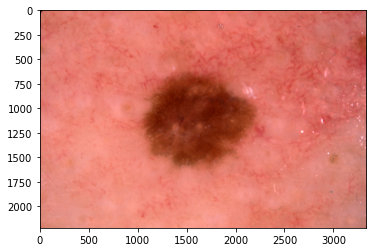

In [42]:
plt.imshow(image_input_train_1.numpy())

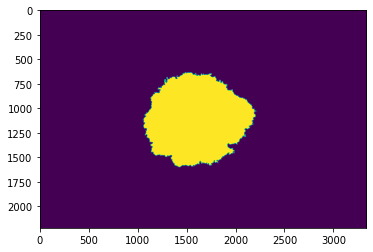

In [43]:
plt.imshow(np.squeeze(ground_truth_train_1.numpy()))

In [48]:
def crop_image(image, truth):
  concat_image = tf.concat([image, truth], axis=-1)
  concat_image = tf.image.resize(concat_image, (280, 280),
                            method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  concat_image = tf.image.random_crop(concat_image, [256, 256, 4])
  return concat_image[ :, :, :3], concat_image[ :, :, 3:]

In [52]:
def normal(image, ground):
  image = tf.cast(image, tf.float32) / 255.0
  ground = tf.cast(ground, tf.int32)
  return image, ground


def load__train_image(image_path, ground_path):
  image = read_jpg(image_path)
  ground = read_png(ground_path)
  
  image, ground = crop_image(image, ground)
      
  image, ground = normal(image, ground)
  
  return image, ground


def load_val_image(image_path, ground_path):
  image = read_jpg(image_path)
  ground = read_png(ground_path)

  image = tf.image.resize(image, (256, 256))
  ground = tf.image.resize(ground, (256, 256))

  image, ground = normal(image, ground)
  
  return image, ground


In [53]:
# set constants
BATCH_SIZE = 32
BUFFER_SIZE = 300

train_count = len(image_input_train)
val_count = len(image_input_val)
train_step = train_count // BATCH_SIZE
val_step = val_count // BATCH_SIZE

In [54]:
auto = tf.data.experimental.AUTOTUNE

train_ds = train_ds.map(load__train_image, num_parallel_calls=auto)
val_ds = val_ds.map(load_val_image, num_parallel_calls=auto)


In [55]:
train_ds = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
val_ds = val_ds.batch(BATCH_SIZE)